In [1]:
import json
import pandas as pd

# Load the parsed invoice data
with open("data/output.json", "r") as f:
    raw_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame.from_dict(raw_data, orient="index")
df.reset_index(inplace=True)
df.rename(columns={"index": "filename"}, inplace=True)

df.head()


,filename,parsed,ground_truth
0,348.png,"{'Invoice Number': '567181', 'Invoice Date': '...",{'buyer': {'address': '0541 Vanessa Glen Garre...
1,60413.png,"{'Invoice Number': '6433-2056', 'Invoice Date'...",{'buyer': {'address': '729 Brian Junctions Ter...
2,20037.png,{'Invoice Number': '25237 Hurley Road Apt. 929...,{'buyer': {'address': '389 Michael Station Apt...
3,30224.png,"{'Invoice Number': 'Wq-6619-6146', 'Invoice Da...",{'buyer': {'address': '63150 Chandler Mountain...
4,60375.png,"{'Invoice Number': '1465-5545', 'Invoice Date'...","{'buyer': {'address': 'PSC 5710, Box 8567 APO ..."


In [2]:
# Expand parsed fields
parsed_df = df["parsed"].apply(pd.Series)
df = pd.concat([df["filename"], parsed_df], axis=1)

df.head()


,filename,Invoice Number,Invoice Date,Vendor Name,Billing Address,Shipping Address,Total Amount,Tax Amount,Due Date
0,348.png,567181,25.04.1999,Faulkner-Mendez Nicole Bryant,"0541 Vanessa Glen Garrettshire, AR 27907 Puert...","0541 Vanessa Glen Garrettshire, AR 27907 Puert...",£547.31,YT35086734334,25.04.1999
1,60413.png,6433-2056,20.03.2012,197.07,"\Wigginstown, IL 98703",729 Brian Junctions,444.68,13.95%,20.03.2012
2,20037.png,25237 Hurley Road Apt. 929,31.08.2021,quinnfelicia@example.org,"389 Michael Station Apt. 584 Frenchburgh, MH 0...","389 Michael Station Apt. 584 Frenchburgh, MH 0...",201.12,201.12,15.01.2005
3,30224.png,Wq-6619-6146,20.07.2003,"Gomez, Gibson and Garza",63150 Chandler Mountains,Saint Helena,-301.38,184.63,15.07.2021
4,60375.png,1465-5545,03.09.2009,213.5,709 Jonathan Estates Suite 264,709 Jonathan Estates Suite 264,475.26,28.34%,03.09.2009


In [3]:
# Convert invoice_date to datetime
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], errors="coerce")

# Convert Total Amount to float
def clean_amount(x):
    if isinstance(x, str):
        x = x.replace("$", "").replace("£", "").replace(",", "").strip()
        try:
            return float(x)
        except:
            return None
    return x

df["Total Amount"] = df["Total Amount"].apply(clean_amount)

df.head()


/var/folders/wx/81znsths6397s07_ggcjfp_80000gn/T/ipykernel_48285/2492166774.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], errors="coerce")


,filename,Invoice Number,Invoice Date,Vendor Name,Billing Address,Shipping Address,Total Amount,Tax Amount,Due Date
0,348.png,567181,1999-04-25,Faulkner-Mendez Nicole Bryant,"0541 Vanessa Glen Garrettshire, AR 27907 Puert...","0541 Vanessa Glen Garrettshire, AR 27907 Puert...",547.31,YT35086734334,25.04.1999
1,60413.png,6433-2056,2012-03-20,197.07,"\Wigginstown, IL 98703",729 Brian Junctions,444.68,13.95%,20.03.2012
2,20037.png,25237 Hurley Road Apt. 929,2021-08-31,quinnfelicia@example.org,"389 Michael Station Apt. 584 Frenchburgh, MH 0...","389 Michael Station Apt. 584 Frenchburgh, MH 0...",201.12,201.12,15.01.2005
3,30224.png,Wq-6619-6146,2003-07-20,"Gomez, Gibson and Garza",63150 Chandler Mountains,Saint Helena,-301.38,184.63,15.07.2021
4,60375.png,1465-5545,2009-09-03,213.5,709 Jonathan Estates Suite 264,709 Jonathan Estates Suite 264,475.26,28.34%,03.09.2009


In [4]:
# Example: Invoices from 2021 and Vendor "Acme Corp"
filtered = df[
    (df["Invoice Date"].dt.year == 2021) &
    (df["Vendor Name"].str.contains("Acme", case=False, na=False))
]

filtered.head()


,filename,Invoice Number,Invoice Date,Vendor Name,Billing Address,Shipping Address,Total Amount,Tax Amount,Due Date


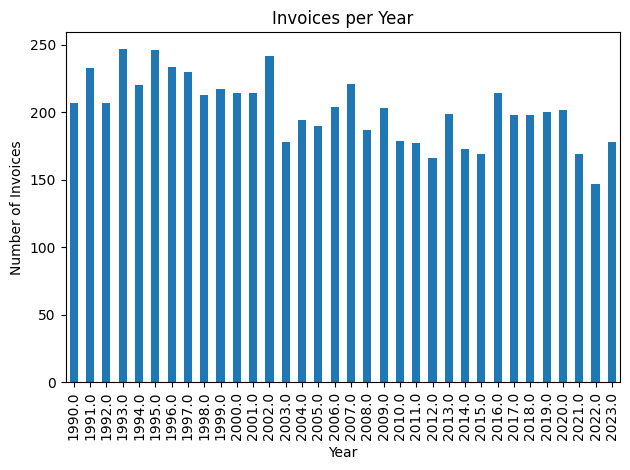

In [5]:
import matplotlib.pyplot as plt

df["year"] = df["Invoice Date"].dt.year
invoices_per_year = df.groupby("year")["filename"].count()

invoices_per_year.plot(kind="bar", title="Invoices per Year")
plt.xlabel("Year")
plt.ylabel("Number of Invoices")
plt.tight_layout()
plt.show()
